In [1]:
cd ..

/Users/gieunkwak/Data Analytics/Repositories/medium


In [3]:
import numpy as np
import pandas.api.types as ptypes
import matplotlib.pyplot as plt
from math import sqrt
import plotly
import seaborn as sns

Create sample data

In [27]:
data = np.random.normal(100*0.5, sqrt(100*0.5*0.5), size=10000)
outliers = np.random.normal(100, sqrt(100), size=10)

data = np.append(data, outliers)

In [34]:
[i/1000 for i in range(990, 1001)]

[0.99, 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999, 1.0]

In [48]:
def identify_outliers(array, quantiles=[i/100 for i in range(90, 101)], 
                                quantiles_specific=[i/1000 for i in range(990, 1001)],
                                only_num_positive=True, title=None, x_lim=None, y_lim=None, verbose=True):
    
    assert ptypes.is_numeric_dtype(array)
    
    if only_num_positive:
        x_array = np.array(array)
        x_array = x_array[np.where(x_array>0)]
    else:
        x_array = np.array(array)
    
    fig, ax1 = plt.subplots(1,1, figsize=(10, 5))
    fig2, ax2 = plt.subplots(1,1, figsize=(10, 5))
    
    sns.kdeplot(data=x_array, cumulative=True, ax=ax1, color='#175788');
    
    sns.kdeplot(data=x_array, ax=ax2, shade=True, color='#175788');
    sns.rugplot(x_array, ax=ax2, color='#175788', alpha=0.5);
    
    ax1.set_xlabel('Values')
    ax1.set_ylabel('Cumulated Density')
    ax2.set_xlabel('Values')
    ax2.set_ylabel('Density')
    
    # ax1.get_legend().remove()
    # ax2.get_legend().remove()
    
    if quantiles:
        quantile_values = np.quantile(x_array, quantiles)
        quantile_specific_values = np.quantile(x_array, quantiles_specific)
    else:
        quantile_values = None
        quantile_specific_values = None
    
    if title:
        ax1.set_title('Cumulated Density Plot - '+title)
        ax2.set_title('Density Plot - '+title)
    
    if verbose:
        print("Quantile from 0.9 to 1: {}".format(quantile_values))
        print("Quantile from 0.99 to 1: {}".format(quantile_specific_values))
    
    if x_lim:
        ax1.set_xlim(x_lim[0], x_lim[1])
    if y_lim:
        ax1.set_ylim(y_lim[0], y_lim[1])
    
    return x_array, fig, fig2, quantile_values, quantile_specific_values

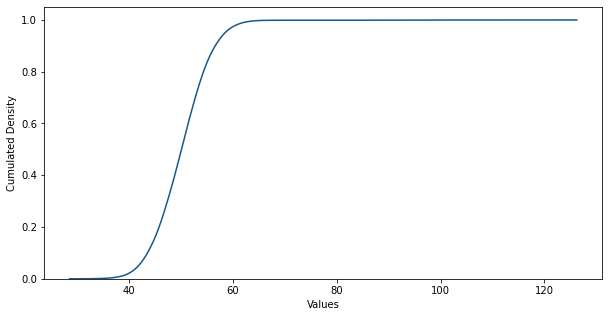

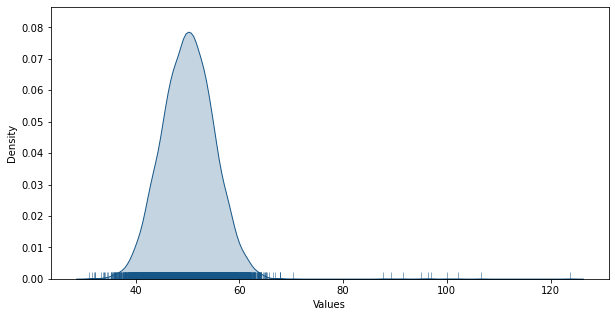

In [49]:
x_array, fig, fig2, quantile_values, quantile_specific_values = identify_outliers(data, verbose=False)

In [33]:
fig2.savefig('plots/identify_outlier_distribution.png')

In [35]:
quantile_values

array([ 56.48937743,  56.81386534,  57.14537321,  57.50570681,
        57.88006184,  58.30789605,  58.77244711,  59.5253623 ,
        60.4306303 ,  61.77353178, 123.77952595])

In [42]:
print("Quantile, and corresponding value: ")
print()
for q, v in zip([i/100 for i in range(90, 101)], quantile_values):
    print("{} : {:.2f}".format(q, v))

Quantile, and corresponding value: 

0.9 : 56.49
0.91 : 56.81
0.92 : 57.15
0.93 : 57.51
0.94 : 57.88
0.95 : 58.31
0.96 : 58.77
0.97 : 59.53
0.98 : 60.43
0.99 : 61.77
1.0 : 123.78


The value steadily increases until the 99th quantile. There seems to have a drastic increase between the 99th and the 100th quantile, and this needs more investigation.

Then lets break the quantile into smaller sectores.

In [41]:
print("Quantile, and corresponding value: ")
print()
for q, v in zip([i/1000 for i in range(990, 1001)], quantile_specific_values):
    print("{} : {:.2f}".format(q, v))

Quantile, and corresponding value: 

0.99 : 61.77
0.991 : 61.95
0.992 : 62.10
0.993 : 62.52
0.994 : 62.78
0.995 : 63.02
0.996 : 63.59
0.997 : 63.97
0.998 : 64.98
0.999 : 70.32
1.0 : 123.78


When the quantile increases from 99.8% to 99.9%, the corresponding value also increases by 6. This is a big step compared to other gradual increases. There is an even greater increase from 99.9% to 100%.

Now lets zoom into the specific quantiles and see what's going on

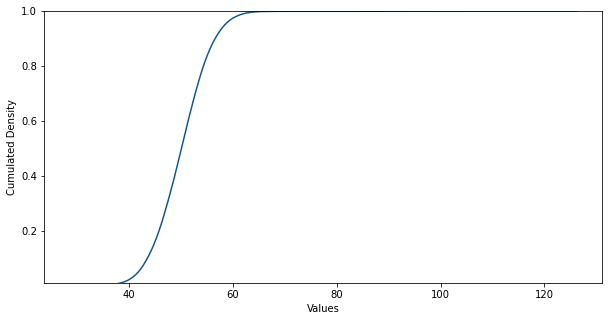

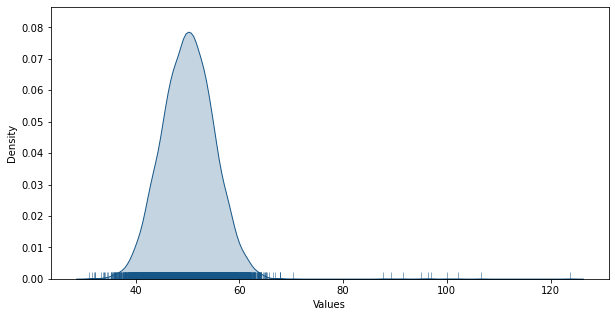

In [65]:
x_array, fig, fig2, quantile_values, quantile_specific_values = identify_outliers(data, 
                                                                                  y_lim=[0.01, 1],
                                                                                  verbose=False)

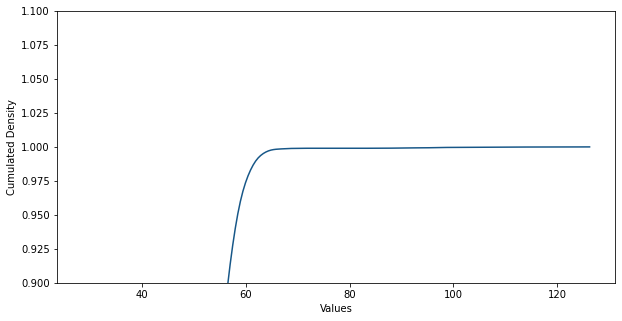

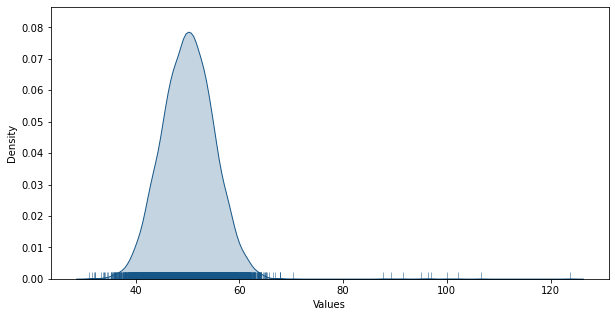

In [66]:
x_array, fig, fig2, quantile_values, quantile_specific_values = identify_outliers(data, 
                                                                                  y_lim=[0.9, 1.1],
                                                                                  verbose=False)

In [ ]:
x_lim=None, y_lim=None